# Natural Language Processing - Sentiment Analysis of Rotten Tomatoes quotes

In [2]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import 

In [3]:
# load data from rt_critics.csv in the data folder of our DAT2 repo
# at 'https://raw.githubusercontent.com/JamesByers/GA-SEA-DAT2/master/data/rt_critics.csv'
RT = pd.read_csv('https://raw.githubusercontent.com/JamesByers/GA-SEA-DAT2/master/data/rt_critics.csv')

In [8]:
# look at first 5 rows
RT.head()

,critic,fresh,imdb,publication,quote,review_date,rtid,title
0,Derek Adams,fresh,114709,Time Out,"So ingenious in concept, design and execution ...",2009-10-04,9559,Toy story
1,Richard Corliss,fresh,114709,TIME Magazine,The year's most inventive comedy.,2008-08-31,9559,Toy story
2,David Ansen,fresh,114709,Newsweek,A winning animated feature that has something ...,2008-08-18,9559,Toy story
3,Leonard Klady,fresh,114709,Variety,The film sports a provocative and appealing st...,2008-06-09,9559,Toy story
4,Jonathan Rosenbaum,fresh,114709,Chicago Reader,"An entertaining computer-generated, hyperreali...",2008-03-10,9559,Toy story


In [9]:
# Check the shape of dataframe
RT.shape

(14072, 8)

In [11]:
# Fresh is the column with ratings.  Count the number of each value in column 'fresh'
RT.fresh.value_counts()

fresh     8613
rotten    5436
none        23
Name: fresh, dtype: int64

In [23]:
# vectorize the quotes and store it on a variable names Xcv
vect = CountVectorizer()
Xcv = vect.fit_transform(RT.quote)
#Xcv = vect.get_feature_names()

In [24]:
# Check the shape of dataframe Xcv
Xcv.shape

(14072, 21544)

But wait! We have more features than samples. This would ensure overfitting. Let's trim that number down to the top 5000, ranked by the term frequency across all documents.

In [25]:
# Create an vectorizer object as a variable named vectorizer that includes just the top 5000
# Hint: check the documentation for CountVectorizer if needed
vectorizer = CountVectorizer(max_features=5000)

In [58]:
#  Create a new vectorized feature matix named Xcv with the new vectorizer
Xcv = vectorizer.fit_transform(RT.quote)

<14072x5000 sparse matrix of type '<type 'numpy.int64'>'
	with 218033 stored elements in Compressed Sparse Row format>

In [52]:
# Create the response vector y where the value is 1 if "fresh" and 0 if any other value than fresh
y = [1 if i=='fresh' else 0 for i in RT.fresh ]

In [53]:
# Determine the null accuracy
y_df = pd.DataFrame(y)
y_df[0].value_counts() / len(RT.fresh)

1    0.612067
0    0.387933
Name: 0, dtype: float64

In [59]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xcv, y, random_state=1)

In [63]:
# Evaluate performance of models using test train split
logression = LogisticRegression()
logression.fit(X_train,y_train)
y_pred = logression.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.757816941444


In [84]:
# Tune the logistic Regression regularization parameter "C" to improve performance.
# Evaluate performance of models using test train split
Cs = [i/10.0 for i in range(1,20)]
for para in Cs:
    logression = LogisticRegression(C=para)
    logression.fit(X_train,y_train)
    y_pred = logression.predict(X_test)
    print "C: ",para
    print "accuracy: ",metrics.accuracy_score(y_test, y_pred)

C:  0.1
accuracy:  0.752416145537
C:  0.2
accuracy:  0.757816941444
C:  0.3
accuracy:  0.762080727686
C:  0.4
accuracy:  0.762649232518
C:  0.5
accuracy:  0.763501989767
C:  0.6
accuracy:  0.759806708357
C:  0.7
accuracy:  0.760659465605
C:  0.8
accuracy:  0.760375213189
C:  0.9
accuracy:  0.759806708357
C:  1.0
accuracy:  0.757816941444
C:  1.1
accuracy:  0.756395679363
C:  1.2
accuracy:  0.755258669699
C:  1.3
accuracy:  0.75440591245
C:  1.4
accuracy:  0.753553155202
C:  1.5
accuracy:  0.753268902786
C:  1.6
accuracy:  0.75440591245
C:  1.7
accuracy:  0.753837407618
C:  1.8
accuracy:  0.752416145537
C:  1.9
accuracy:  0.752700397953


In [ ]:
#Bonus: Create a for loop to find the C value
# that produces the most accurate model 


# Stop Words

The performance isn't bad, but it's not great. Let's see if we can improve things by [using stop words](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)?

In [4]:
# Modify your vectorizer to also remove stop words (still allow only 5000 features)
vect = CountVectorizer(stop_words='english',max_features=5000)
# create a new vectorizer object that only allows 5000 features
RT = pd.read_csv('https://raw.githubusercontent.com/JamesByers/GA-SEA-DAT2/master/data/rt_critics.csv')

In [5]:
RT.head()

,critic,fresh,imdb,publication,quote,review_date,rtid,title
0,Derek Adams,fresh,114709,Time Out,"So ingenious in concept, design and execution ...",2009-10-04,9559,Toy story
1,Richard Corliss,fresh,114709,TIME Magazine,The year's most inventive comedy.,2008-08-31,9559,Toy story
2,David Ansen,fresh,114709,Newsweek,A winning animated feature that has something ...,2008-08-18,9559,Toy story
3,Leonard Klady,fresh,114709,Variety,The film sports a provocative and appealing st...,2008-06-09,9559,Toy story
4,Jonathan Rosenbaum,fresh,114709,Chicago Reader,"An entertaining computer-generated, hyperreali...",2008-03-10,9559,Toy story


In [6]:
# Create a new X called Xcvs
Xcvs = RT.quote
ycvs = map(RT.fresh

In [ ]:
# split the converted data (Xcvs) into training and test sets
Xcvs_train, Xcvs_test, ycvs_train, ycvs_test = train_test_split(Xcvs, y, random_state=1)

In [ ]:
# Evaluate performance of models using the test data
# Tune the regularization parameter, C, to improve performance.


In [ ]:
# Tune the regularization parameter, C, to improve performance.


In [ ]:
#Alternate tuning of C using for loop


# tf-idf

If that didn't work, how about using tf-idf weighting?

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

In [34]:
# edit this cell to create a TfidfVectorizer instead of a simple CountVectorizer
# or start with your own model with CountVectorizer from the cells above
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)

# Create Xti and y
Xti = vectorizer.fit_transform(RT['quote'])
y = (RT['fresh'] == 'fresh').values.astype(np.int8)

# split the converted data into training and test sets
xtrainti, xtestti, ytrainti, ytestti = train_test_split(Xti, y, random_state=1)

In [35]:
Xti.shape

(14072, 10000)

In [36]:
Y.shape

(14072,)

In [37]:
# Evaluate performance of the new model
model = LogisticRegression()
model.fit(xtrainti, ytrainti)
ypredict = model.predict(xtestti)
print metrics.accuracy_score(ytestti, ypredict)

0.761227970438


In [38]:
# Tune the regularization parameter, C, to improve performance.
Cs = [i/10.0 for i in range(1,200)]
accuracies = []
for para in Cs:
    model = LogisticRegression(C=para)
    model.fit(xtrainti,ytrainti)
    ypredict = model.predict(xtestti)
    #print "C: ",para
    #print "accuracy: ",metrics.accuracy_score(ytestti, ypredict)
    accuracies.append(metrics.accuracy_score(ytestti, ypredict))

In [ ]:
#Bonus: if you have time find the best value of C using a for loop


# tf-idf and stop words

Do both together help?

In [39]:
# edit this cell to create a TfidfVectorizer that uses stop words

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

# Create Xti and y
Xti = vectorizer.fit_transform(RT['quote'])
y = (RT['fresh'] == 'fresh').values.astype(np.int8)

# split the converted data into training and test sets
xtrainti, xtestti, ytrainti, ytestti = train_test_split(Xti, y, random_state=1)

In [40]:
# Evaluate performance of models
# Tune the regularization parameter, C, to improve performance.
# Tune the regularization parameter, C, to improve performance.
Cs1 = [i/10.0 for i in range(1,200)]
accuracies1 = []
for para in Cs1:
    model = LogisticRegression(C=para)
    model.fit(xtrainti,ytrainti)
    ypredict = model.predict(xtestti)
    #print "C: ",para
    #print "accuracy: ",metrics.accuracy_score(ytestti, ypredict)
    accuracies1.append(metrics.accuracy_score(ytestti, ypredict))

In [41]:
# Tune the regularization parameter, C, to improve performance.
import matplotlib.pyplot as plt

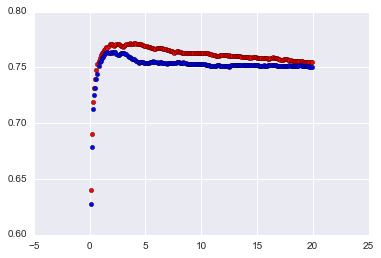

In [43]:
%matplotlib inline
plt.scatter(Cs,accuracies, c='red')
plt.scatter(Cs1,accuracies1)

# Next steps

Are you satisfied with these results? Why might you be less than satisfied? How can you explain the observed behavior? What are the next steps you would need to do to improve this classifier? If you have time remaining, try a few strategies out below.

In [ ]:
# continue playing here

# Use pipeline to evaluate accuracy with cross validation

# More Next Steps

The hardest part of creating a sentiment model is finding good training data. Googling 'sentiment analysis training data' or 'sentiment analysis test data' turns up a few freely available sources. Most of them are hosted by universities.

But notice, determining the judgment of a movie review isn't the same task as determining the emotional content of a tweet. And yet, it kind of is. The computer doesn't know anything about nature of the text. All it knows is that there are documents with one label (fresh/happy) and documents with another label (rotten/sad) and it needs to fit a model to discriminate between the two. This can be extended to more classes (look into the 20 newsgroups dataset in sci-kit learn) and to proprietary corpora.

One application you might use at work is classifying support emails from users. The classes may be 'ranting', 'mischarge', 'lost order', 'gushing'. Or whatever is common. Even if the classifier isn't perfect, it could help streamline the process of getting the right emails to the right support personnel.

In [ ]:
from IPython.display import HTML
HTML('''
<style>
.text_cell_render {
  background-color: silver
}
</style>
''')